In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [3]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [4]:
from geoplot import geoplot as gplt

In [5]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [6]:
cc.geometry.head(1)

DATE
08/25/2015    POINT (-73.9203819 40.7329414)
Name: geometry, dtype: object

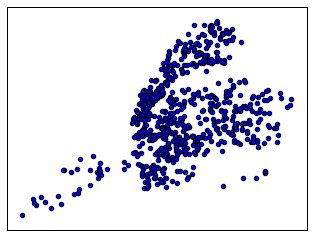

In [58]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

In [ ]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(46)pointplot()
-> if ('lon_0' in proj_params.keys() and proj_params['lon_0'] == 0) or\
(Pdb) c
{'lat_2': 50.0, 'proj': 'aea', 'lat_1': 20.0, 'x_0': 0.0, 'y_0': 0.0, 'ellps': 'WGS84', 'central_latitude': 38.834700143022069, 'central_longitude': -91.360458123871652}


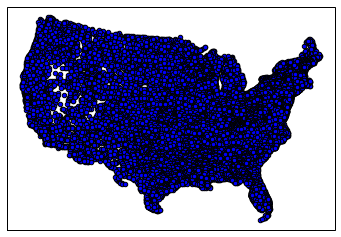

In [36]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(54)pointplot()
-> if ('lon_0' in proj_params.keys() and proj_params['lon_0'] == 0) or\
(Pdb) c
{'ellps': 'WGS84', 'proj': 'ortho', 'central_latitude': 38.834700143022069, 'central_longitude': -91.360458123871652}


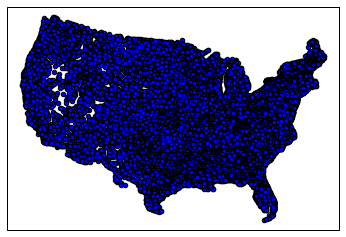

In [41]:
gplt.pointplot(cities_m, projection=ccrs.Orthographic())

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(54)pointplot()
-> if ('lon_0' in proj_params.keys() and proj_params['lon_0'] == 0) or\
(Pdb) c


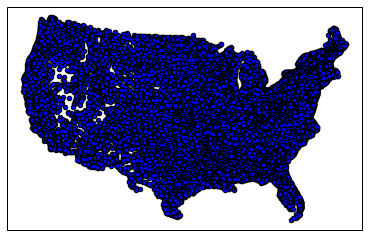

In [42]:
gplt.pointplot(cities_m, projection=ccrs.LambertConformal())

In [43]:
# from geoplot import crs
# crs.factory("LambertCylindrical")

In [56]:
import mplleaflet
gplt.pointplot(cc)
mplleaflet.display()

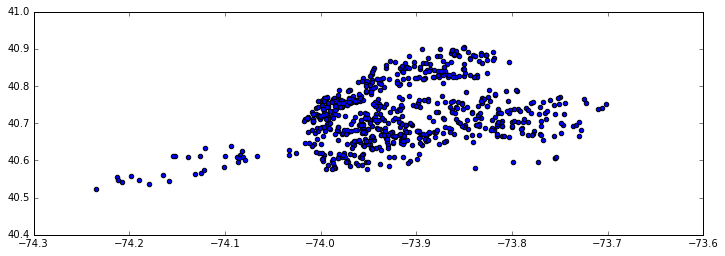

In [55]:
gplt.pointplot(cc)